In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

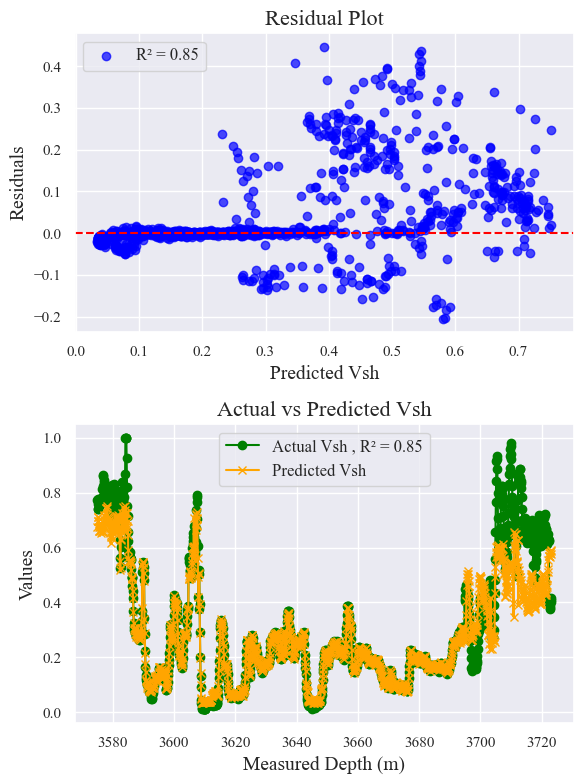

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assuming df_test is already defined with 'y', 'y_pred', and 'DEPTH' columns

# Calculate residuals
df_test['residuals'] = df_test['y'] - df_test['y_pred']

# Calculate R² score
r2 = r2_score(df_test['y'], df_test['y_pred'])

# Set the font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Create a figure with subplots
fig, axs = plt.subplots(2, 1, figsize=(6, 8), tight_layout=True)

# Residual plot
axs[0].scatter(df_test['y_pred'], df_test['residuals'], color='blue', alpha=0.7)
axs[0].axhline(0, color='red', linestyle='--')
axs[0].set_title('Residual Plot', fontsize=16)
axs[0].set_xlabel('Predicted Vsh', fontsize=14)
axs[0].set_ylabel('Residuals', fontsize=14)
axs[0].grid(True)
axs[0].legend([f'R² = {r2:.2f}'], loc='upper left', fontsize=12)

# Line plot of y and y_pred with respect to DEPTH
axs[1].plot(df_test['DEPTH'], df_test['y'], label='Actual (y)', marker='o', color='green')
axs[1].plot(df_test['DEPTH'], df_test['y_pred'], label='Predicted Vsh', marker='x', color='orange')
axs[1].set_title('Actual vs Predicted Vsh', fontsize=16)
axs[1].set_xlabel('Measured Depth (m)', fontsize=14)
axs[1].set_ylabel('Values', fontsize=14)
axs[1].legend([f'Actual Vsh , R² = {r2:.2f}', 'Predicted Vsh'], fontsize=12)
axs[1].grid(True)



# Save the plots as a high-resolution image
plt.savefig('XGB_11A.png', dpi=1000)

# Show the plots
plt.show()

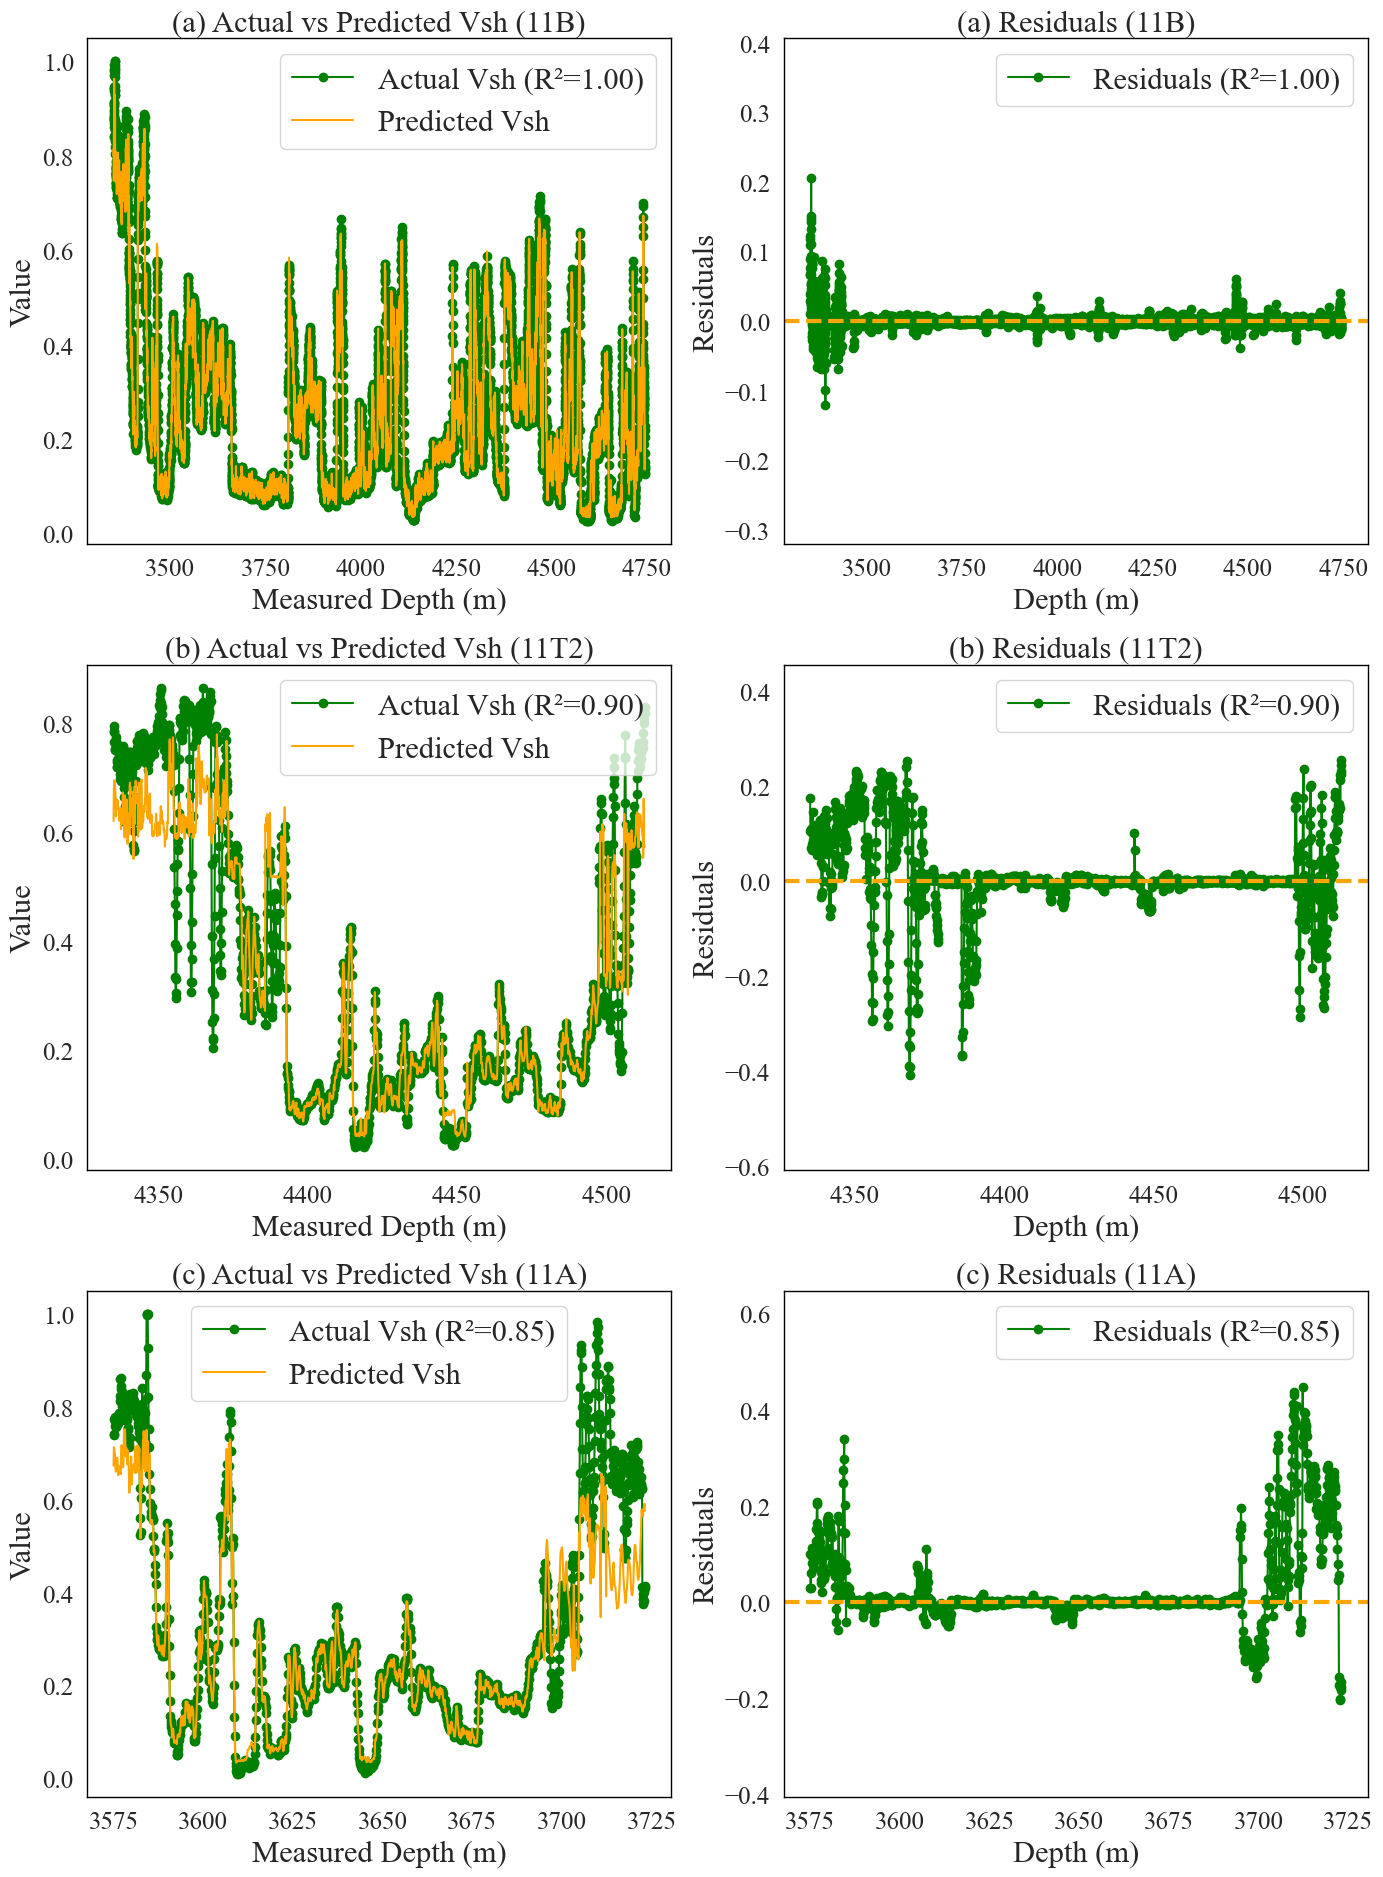

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Example DataFrames (replace these with your actual datasets)
df_test1 = pd.read_excel(r'output\xgboost\predicted_xgboost_model.xlsx')
df_test2 = pd.read_excel(r'output\xgboost\predicted__T2 WHOLE PREDICT.xlsx')
df_test3 = pd.read_excel(r'output\xgboost\predicted_11A_whole.xlsx')

datasets = [df_test1, df_test2, df_test3]
titles = ['11B', '11T2', '11A']
labels = ['a', 'b', 'c']  # Legends for the subplots

# Set Seaborn style
sns.set_style("white")

# Set font properties
plt.rc('font', family='Times New Roman', size=14)  # Base font size

# Set up the subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 19))

# Define a professional color palette
colors = ['orange', 'green', 'green', 'orange']

for i, df_test in enumerate(datasets):
    # Calculate residuals
    df_test['residual'] = df_test['y'] - df_test['y_pred']

    # Calculate R² value
    r2 = r2_score(df_test['y'], df_test['y_pred'])

    # Line plots with the professional color palette
    axs[i, 0].plot(df_test['DEPTH'], df_test['y'], label=f'Actual Vsh (R²={r2:.2f})', marker='o', color=colors[1])  # Green
    axs[i, 0].plot(df_test['DEPTH'], df_test['y_pred'], label='Predicted Vsh', linestyle='-', color=colors[0])  # Solid orange line
    axs[i, 0].set_title(f'({labels[i]}) Actual vs Predicted Vsh ({titles[i]})', fontsize=22)
    axs[i, 0].set_xlabel('Measured Depth (m)', fontsize=22)
    axs[i, 0].set_ylabel('Value', fontsize=22)
    axs[i, 0].legend(fontsize=22)

    # Residual plots
    axs[i, 1].plot(df_test['DEPTH'], df_test['residual'], marker='o', color=colors[2])  # Green
    axs[i, 1].set_title(f'({labels[i]}) Residuals ({titles[i]})', fontsize=22)
    axs[i, 1].set_xlabel('Depth (m)', fontsize=22)
    axs[i, 1].set_ylabel('Residuals', fontsize=22)

    # Add horizontal line at y=0 for reference in orange
    axs[i, 1].axhline(0, color='orange', linestyle='--', linewidth=3)  # Orange line

    # Add R² to the legend
    axs[i, 1].legend([f'Residuals (R²={r2:.2f})'], loc='upper right', fontsize=22)

    axs[i, 1].set_ylim(df_test['residual'].min() - 0.2, df_test['residual'].max()+0.2)  # Set limits for better visibility

    # Set tick parameters
    axs[i, 0].tick_params(axis='both', which='major', labelsize=18)
    axs[i, 1].tick_params(axis='both', which='major', labelsize=18)

    # Add a border around each subplot
    for spine in axs[i, 0].spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

    for spine in axs[i, 1].spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

# Adjust layout
plt.tight_layout()
plt.savefig('xgb.png', dpi=1000)
plt.show()

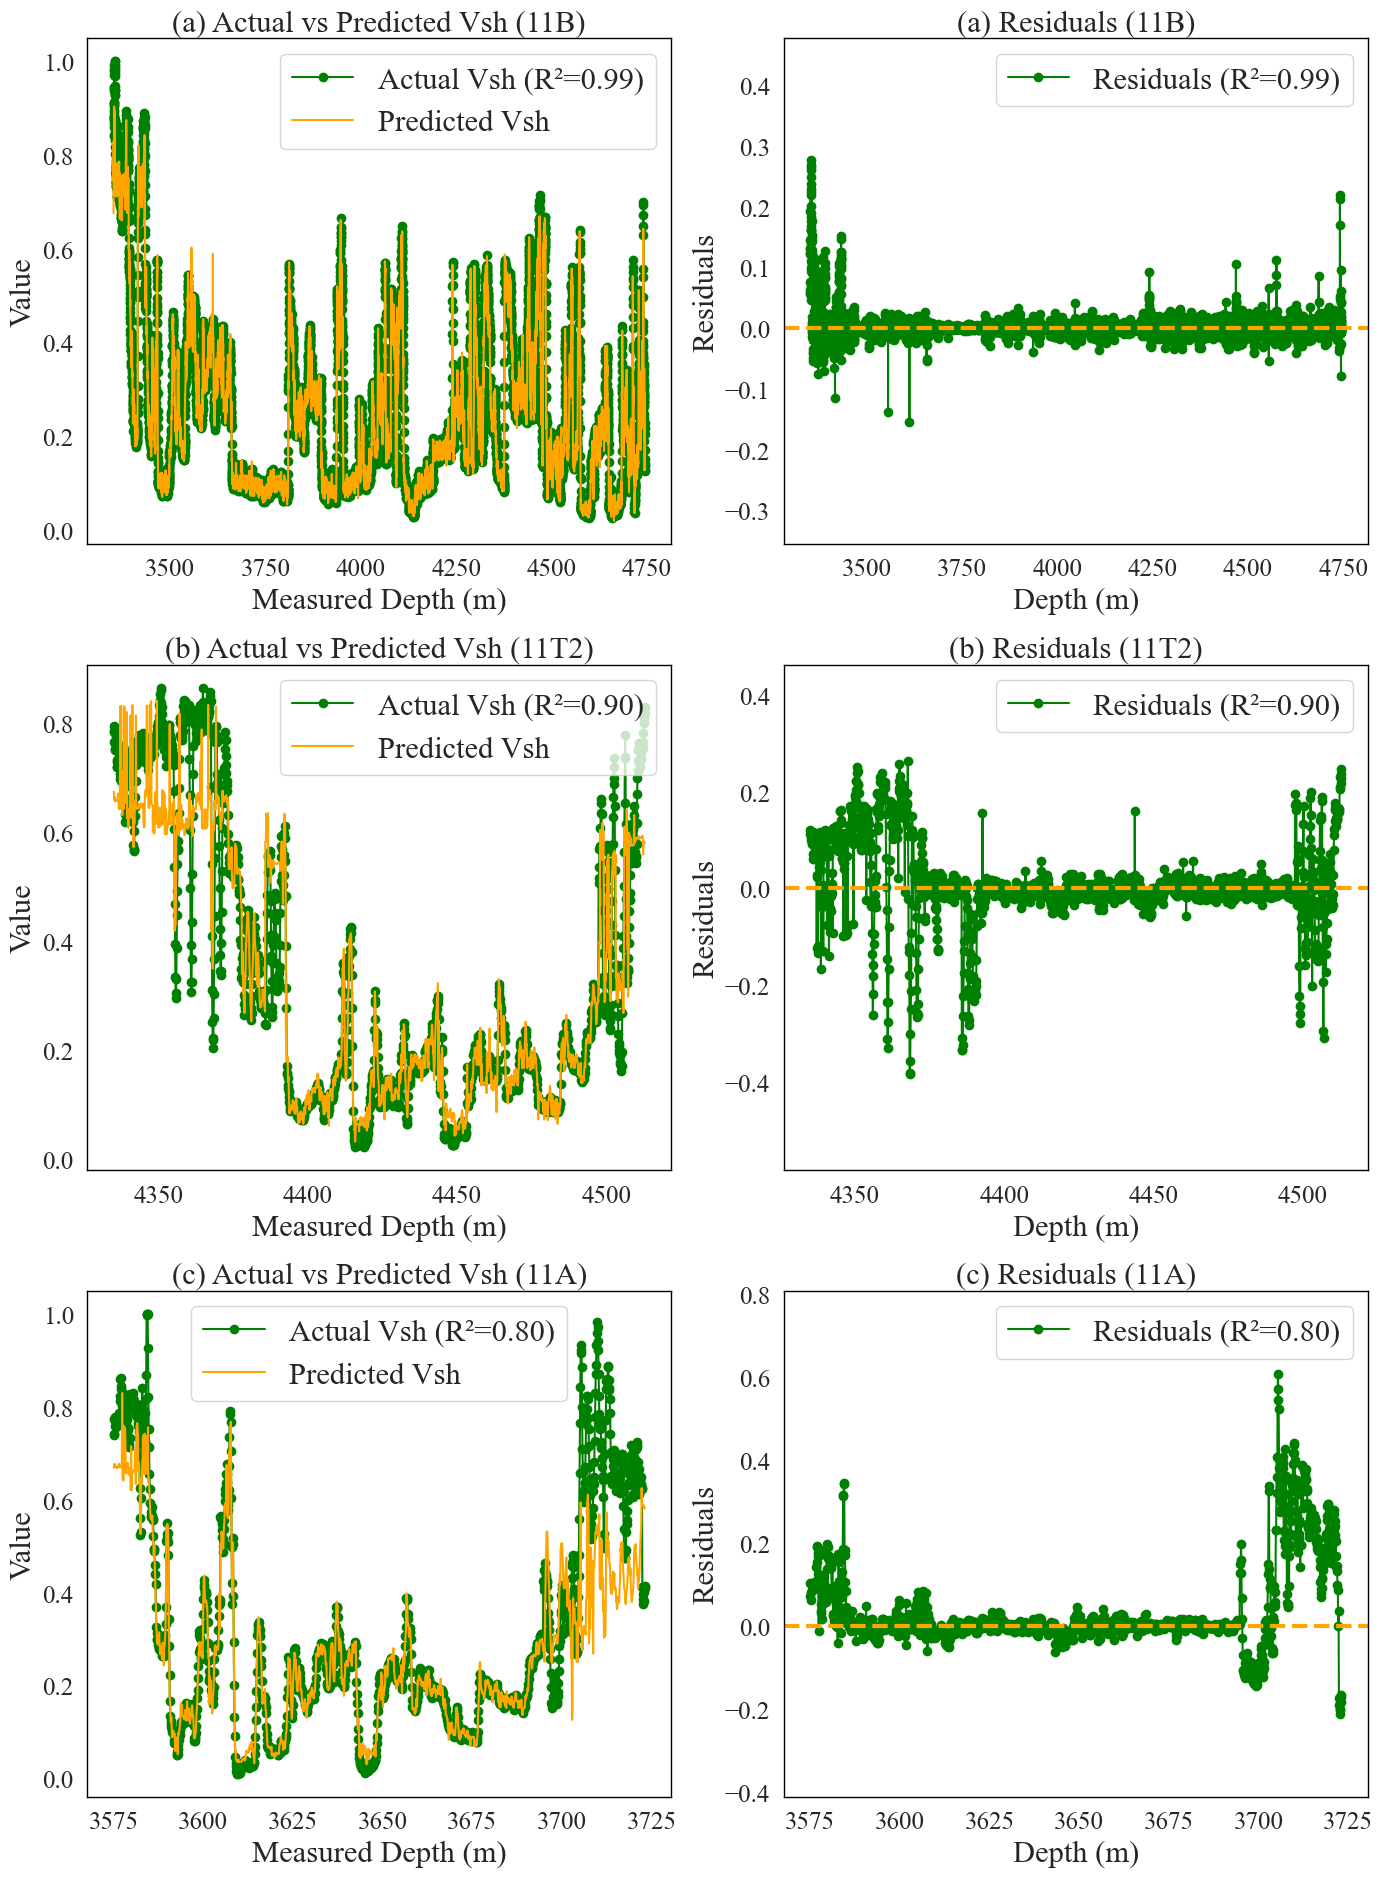

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Example DataFrames (replace these with your actual datasets)
df_test1 = pd.read_excel(r'output\gradient_boosting_B\predicted_gradient_boosting_model.xlsx')
df_test2 = pd.read_excel(r'output\gradient_boosting_B\predicted__T2 WHOLE PREDICT.xlsx')
df_test3 = pd.read_excel(r'output\gradient_boosting_B\predicted_11A_whole.xlsx')

datasets = [df_test1, df_test2, df_test3]
titles = ['11B', '11T2', '11A']
labels = ['a', 'b', 'c']  # Legends for the subplots

# Set Seaborn style
sns.set_style("white")

# Set font properties
plt.rc('font', family='Times New Roman', size=14)  # Base font size

# Set up the subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 19))

# Define a professional color palette
colors = ['orange', 'green', 'green', 'orange']

for i, df_test in enumerate(datasets):
    # Calculate residuals
    df_test['residual'] = df_test['y'] - df_test['y_pred']

    # Calculate R² value
    r2 = r2_score(df_test['y'], df_test['y_pred'])

    # Line plots with the professional color palette
    axs[i, 0].plot(df_test['DEPTH'], df_test['y'], label=f'Actual Vsh (R²={r2:.2f})', marker='o', color=colors[1])  # Green
    axs[i, 0].plot(df_test['DEPTH'], df_test['y_pred'], label='Predicted Vsh', linestyle='-', color=colors[0])  # Solid orange line
    axs[i, 0].set_title(f'({labels[i]}) Actual vs Predicted Vsh ({titles[i]})', fontsize=22)
    axs[i, 0].set_xlabel('Measured Depth (m)', fontsize=22)
    axs[i, 0].set_ylabel('Value', fontsize=22)
    axs[i, 0].legend(fontsize=22)

    # Residual plots
    axs[i, 1].plot(df_test['DEPTH'], df_test['residual'], marker='o', color=colors[2])  # Green
    axs[i, 1].set_title(f'({labels[i]}) Residuals ({titles[i]})', fontsize=22)
    axs[i, 1].set_xlabel('Depth (m)', fontsize=22)
    axs[i, 1].set_ylabel('Residuals', fontsize=22)

    # Add horizontal line at y=0 for reference in orange
    axs[i, 1].axhline(0, color='orange', linestyle='--', linewidth=3)  # Orange line

    # Add R² to the legend
    axs[i, 1].legend([f'Residuals (R²={r2:.2f})'], loc='upper right', fontsize=22)

    axs[i, 1].set_ylim(df_test['residual'].min() - 0.2, df_test['residual'].max()+0.2)  # Set limits for better visibility

    # Set tick parameters
    axs[i, 0].tick_params(axis='both', which='major', labelsize=18)
    axs[i, 1].tick_params(axis='both', which='major', labelsize=18)

    # Add a border around each subplot
    for spine in axs[i, 0].spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

    for spine in axs[i, 1].spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

# Adjust layout
plt.tight_layout()
plt.savefig('GB.png', dpi=1000)
plt.show()

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


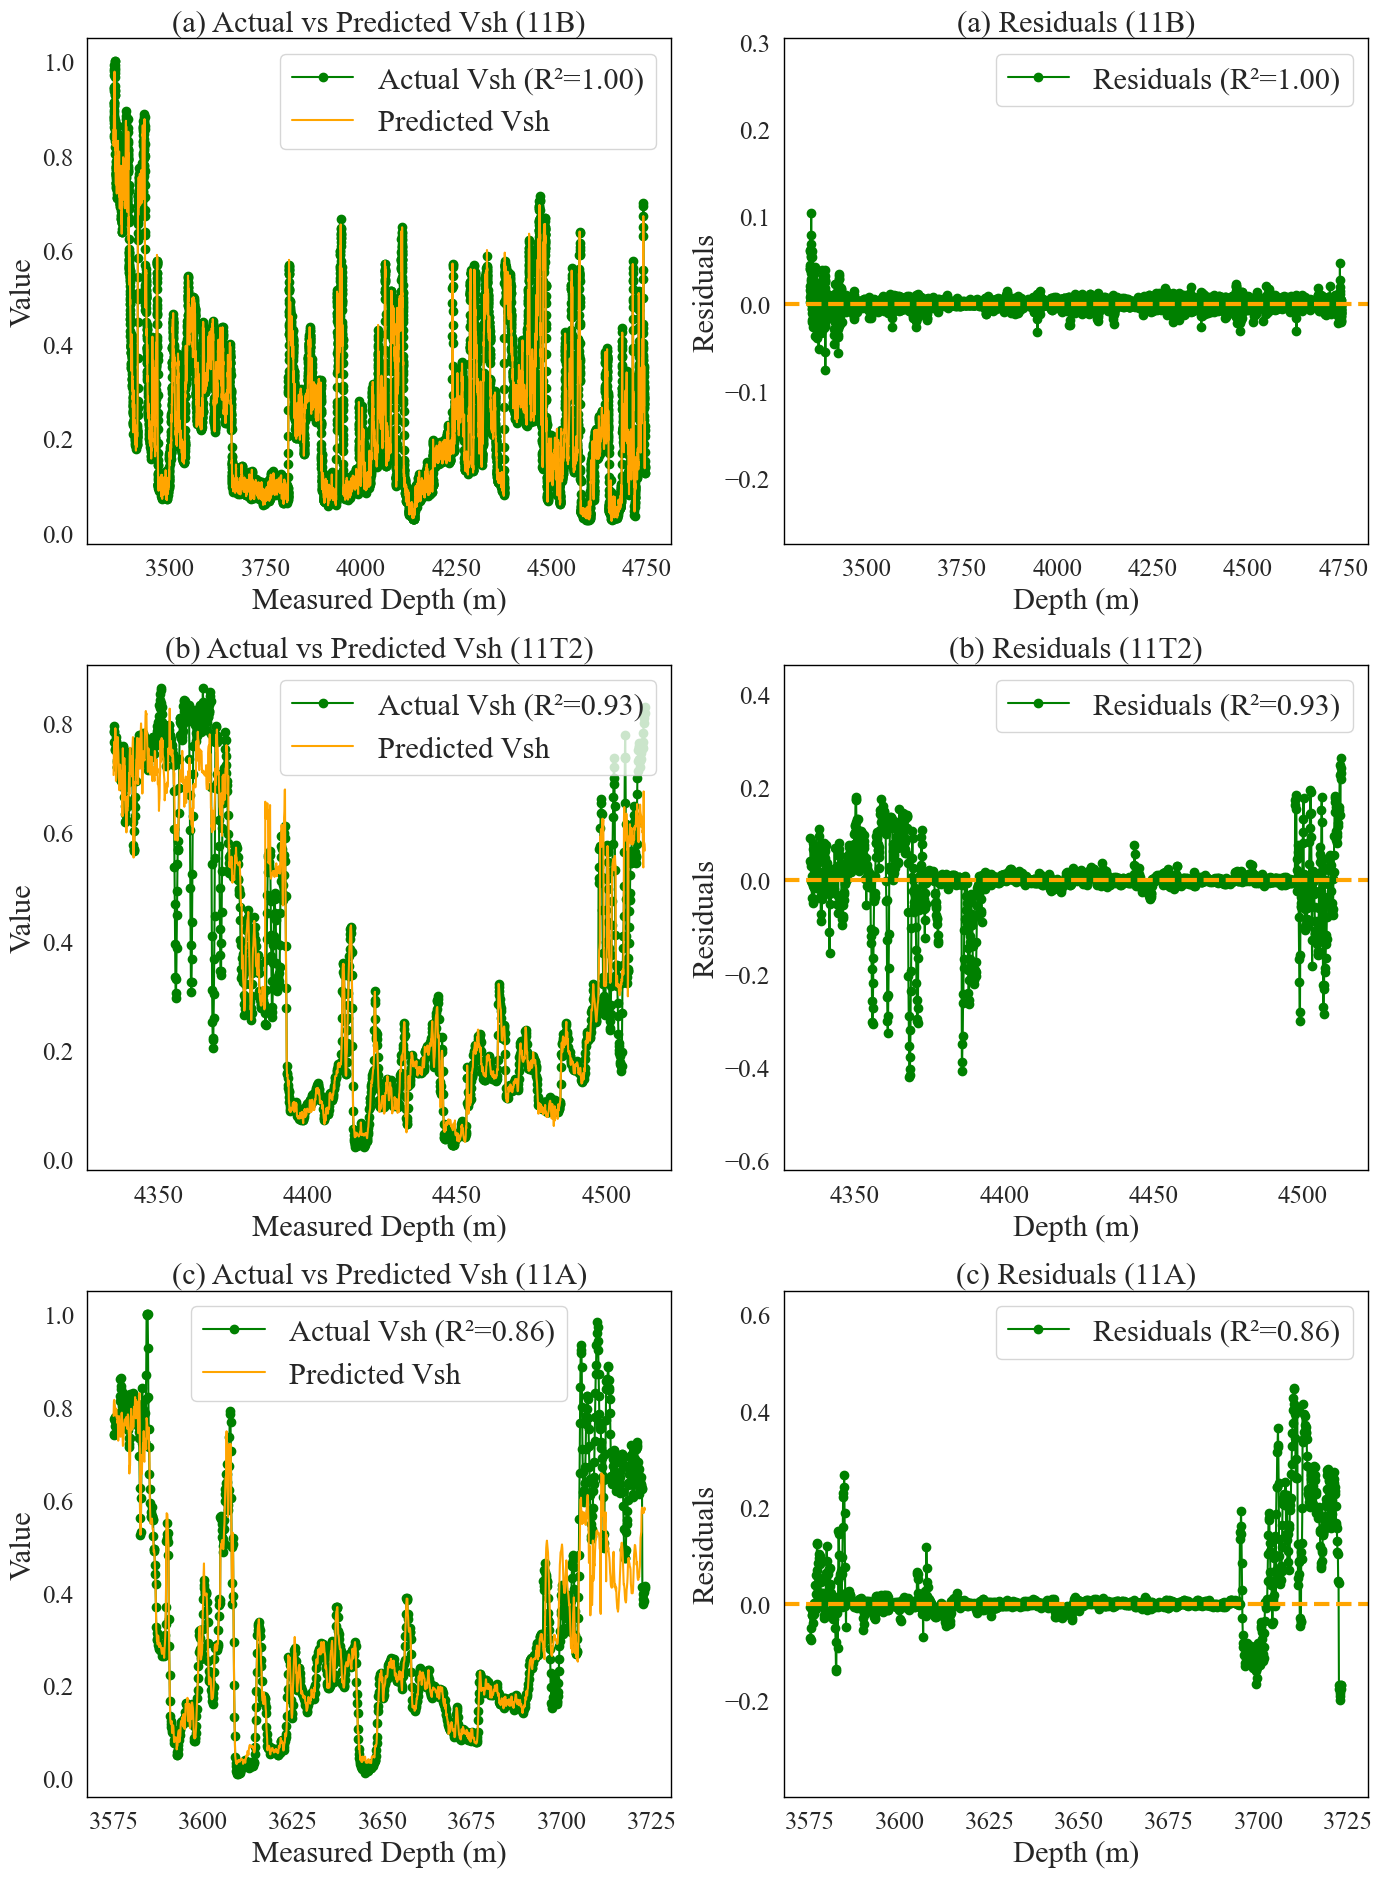

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Example DataFrames (replace these with your actual datasets)
df_test1 = pd.read_excel(r'output\stack_1_n\predicted_stack_1_model_GCVm.xlsx')
df_test2 = pd.read_excel(r'output\stack_1_n\predicted__T2 WHOLE PREDICT.xlsx')
df_test3 = pd.read_excel(r'output\stack_1_n\predicted_11A_whole.xlsx')

datasets = [df_test1, df_test2, df_test3]
titles = ['11B', '11T2', '11A']
labels = ['a', 'b', 'c']  # Legends for the subplots

# Set Seaborn style
sns.set_style("white")

# Set font properties
plt.rc('font', family='Times New Roman', size=14)  # Base font size

# Set up the subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 19))

# Define a professional color palette
colors = ['orange', 'green', 'green', 'orange']

for i, df_test in enumerate(datasets):
    # Calculate residuals
    df_test['residual'] = df_test['y'] - df_test['y_pred']

    # Calculate R² value
    r2 = r2_score(df_test['y'], df_test['y_pred'])

    # Line plots with the professional color palette
    axs[i, 0].plot(df_test['DEPTH'], df_test['y'], label=f'Actual Vsh (R²={r2:.2f})', marker='o', color=colors[1])  # Green
    axs[i, 0].plot(df_test['DEPTH'], df_test['y_pred'], label='Predicted Vsh', linestyle='-', color=colors[0])  # Solid orange line
    axs[i, 0].set_title(f'({labels[i]}) Actual vs Predicted Vsh ({titles[i]})', fontsize=22)
    axs[i, 0].set_xlabel('Measured Depth (m)', fontsize=22)
    axs[i, 0].set_ylabel('Value', fontsize=22)
    axs[i, 0].legend(fontsize=22)

    # Residual plots
    axs[i, 1].plot(df_test['DEPTH'], df_test['residual'], marker='o', color=colors[2])  # Green
    axs[i, 1].set_title(f'({labels[i]}) Residuals ({titles[i]})', fontsize=22)
    axs[i, 1].set_xlabel('Depth (m)', fontsize=22)
    axs[i, 1].set_ylabel('Residuals', fontsize=22)

    # Add horizontal line at y=0 for reference in orange
    axs[i, 1].axhline(0, color='orange', linestyle='--', linewidth=3)  # Orange line

    # Add R² to the legend
    axs[i, 1].legend([f'Residuals (R²={r2:.2f})'], loc='upper right', fontsize=22)

    axs[i, 1].set_ylim(df_test['residual'].min() - 0.2, df_test['residual'].max()+0.2)  # Set limits for better visibility

    # Set tick parameters
    axs[i, 0].tick_params(axis='both', which='major', labelsize=18)
    axs[i, 1].tick_params(axis='both', which='major', labelsize=18)

    # Add a border around each subplot
    for spine in axs[i, 0].spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

    for spine in axs[i, 1].spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

# Adjust layout
plt.tight_layout()
plt.savefig('HM.png', dpi=1000)
plt.show()

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


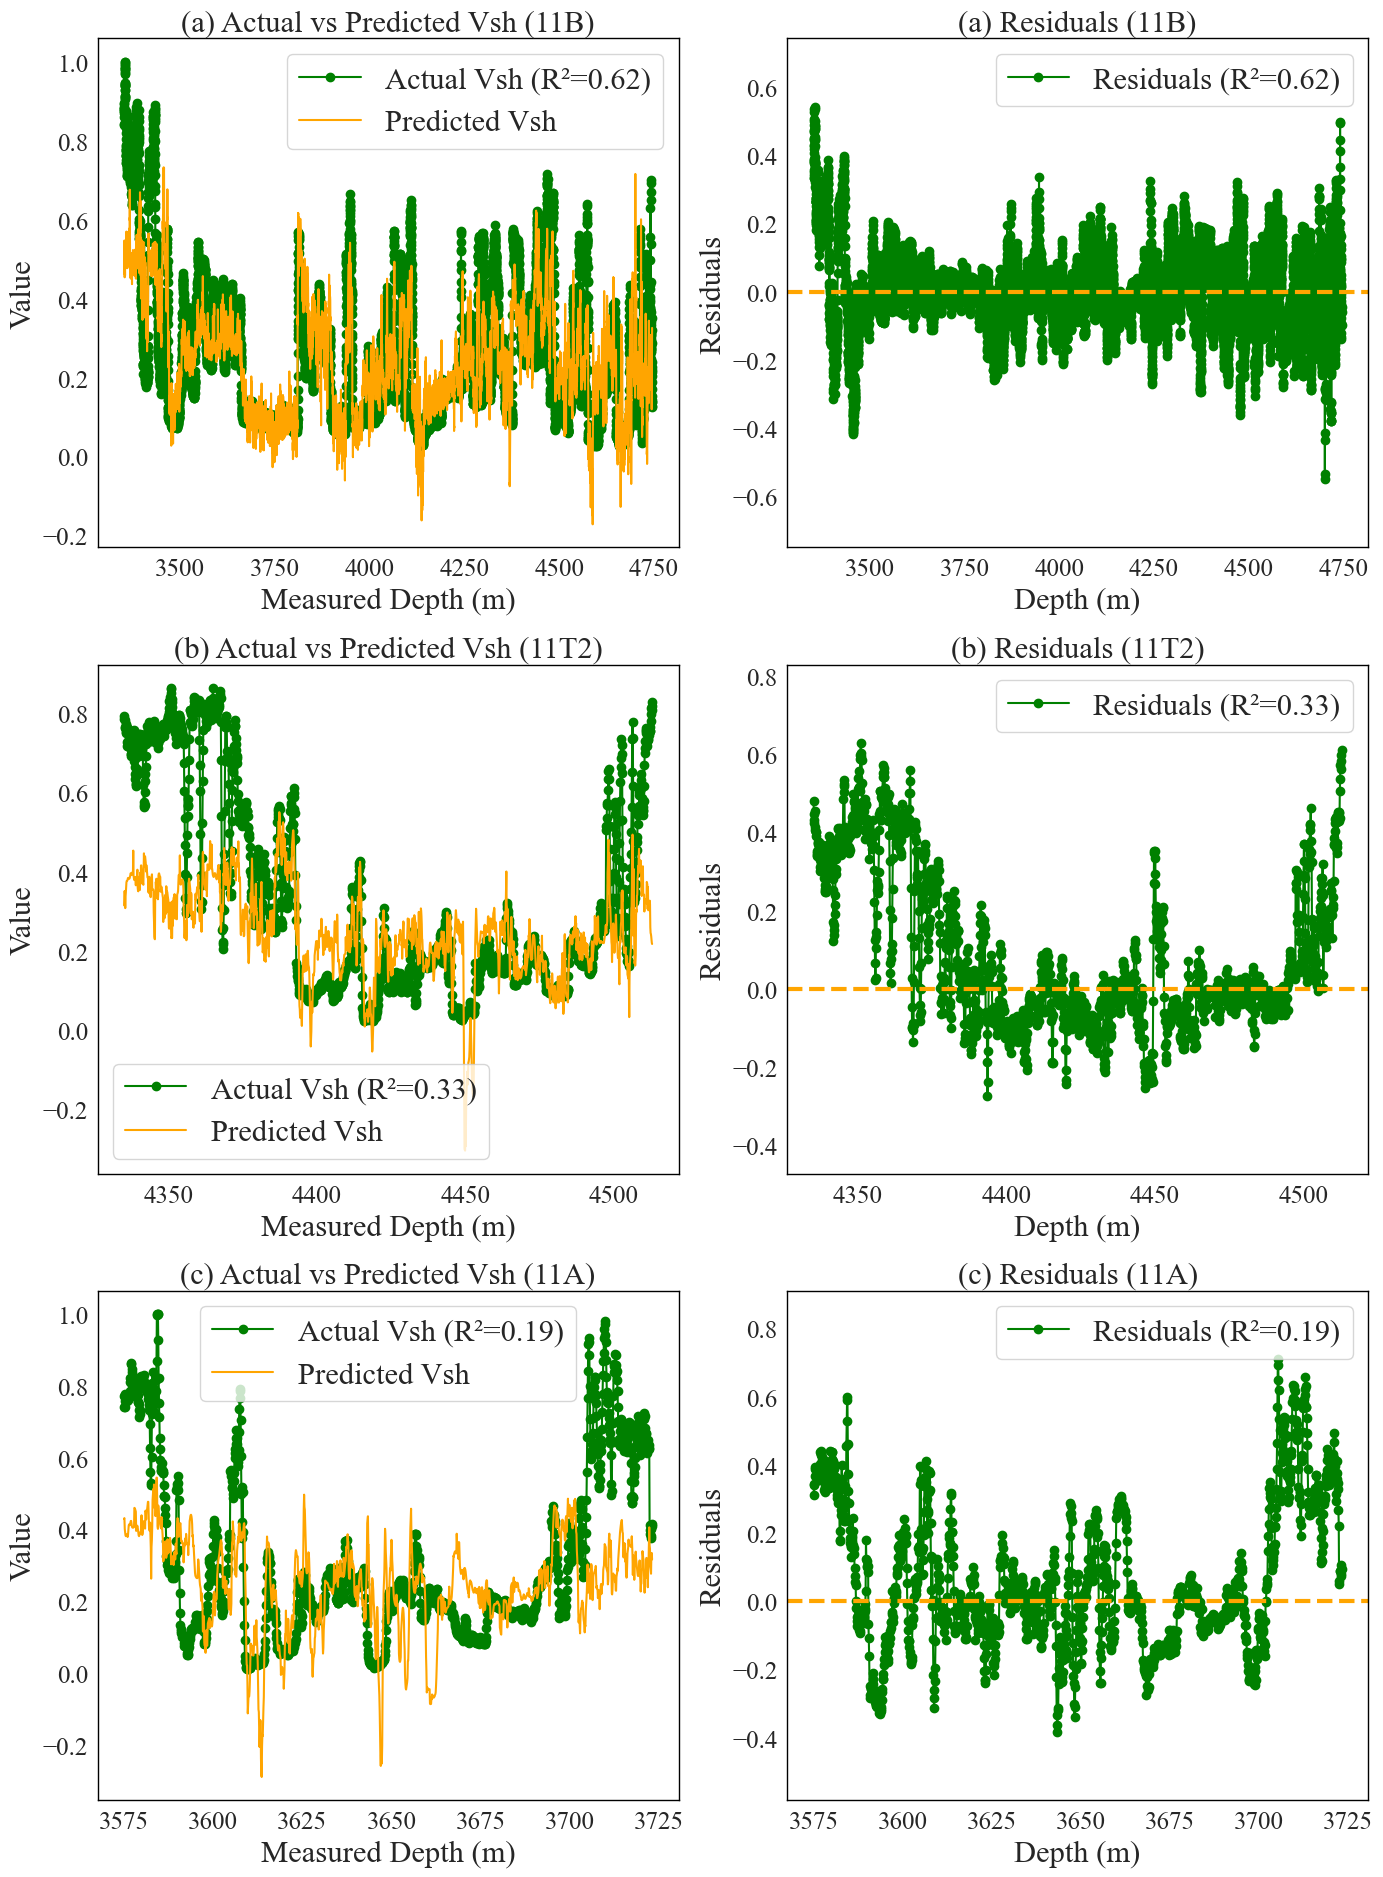

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Example DataFrames (replace these with your actual datasets)
df_test1 = pd.read_excel(r'output\mvr\predicted_mvr_model_11b.xlsx')
df_test2 = pd.read_excel(r'output\mvr\predicted_mvr_model_t2.xlsx')
df_test3 = pd.read_excel(r'output\mvr\predicted_mvr_model_11A.xlsx')

datasets = [df_test1, df_test2, df_test3]
titles = ['11B', '11T2', '11A']
labels = ['a', 'b', 'c']  # Legends for the subplots

# Set Seaborn style
sns.set_style("white")

# Set font properties
plt.rc('font', family='Times New Roman', size=14)  # Base font size

# Set up the subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 19))

# Define a professional color palette
colors = ['orange', 'green', 'green', 'orange']

for i, df_test in enumerate(datasets):
    # Calculate residuals
    df_test['residual'] = df_test['y'] - df_test['y_pred']

    # Calculate R² value
    r2 = r2_score(df_test['y'], df_test['y_pred'])

    # Line plots with the professional color palette
    axs[i, 0].plot(df_test['DEPTH'], df_test['y'], label=f'Actual Vsh (R²={r2:.2f})', marker='o', color=colors[1])  # Green
    axs[i, 0].plot(df_test['DEPTH'], df_test['y_pred'], label='Predicted Vsh', linestyle='-', color=colors[0])  # Solid orange line
    axs[i, 0].set_title(f'({labels[i]}) Actual vs Predicted Vsh ({titles[i]})', fontsize=22)
    axs[i, 0].set_xlabel('Measured Depth (m)', fontsize=22)
    axs[i, 0].set_ylabel('Value', fontsize=22)
    axs[i, 0].legend(fontsize=22)

    # Residual plots
    axs[i, 1].plot(df_test['DEPTH'], df_test['residual'], marker='o', color=colors[2])  # Green
    axs[i, 1].set_title(f'({labels[i]}) Residuals ({titles[i]})', fontsize=22)
    axs[i, 1].set_xlabel('Depth (m)', fontsize=22)
    axs[i, 1].set_ylabel('Residuals', fontsize=22)

    # Add horizontal line at y=0 for reference in orange
    axs[i, 1].axhline(0, color='orange', linestyle='--', linewidth=3)  # Orange line

    # Add R² to the legend
    axs[i, 1].legend([f'Residuals (R²={r2:.2f})'], loc='upper right', fontsize=22)

    axs[i, 1].set_ylim(df_test['residual'].min() - 0.2, df_test['residual'].max()+0.2)  # Set limits for better visibility

    # Set tick parameters
    axs[i, 0].tick_params(axis='both', which='major', labelsize=18)
    axs[i, 1].tick_params(axis='both', which='major', labelsize=18)

    # Add a border around each subplot
    for spine in axs[i, 0].spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

    for spine in axs[i, 1].spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

# Adjust layout
plt.tight_layout()
plt.savefig('mvr.png', dpi=1000)
plt.show()